In [109]:
# Useful starting lines
import sys
print(sys.path)
from labs.ex02.template.costs import *
from labs.ex02.template.grid_search import *
from labs.ex02.template.helpers import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

['C:\\Users\\dridr\\Documents\\EPFL\\ML\\Hub\\ML_course\\labs\\ex03\\template', 'C:\\Users\\dridr\\Documents\\EPFL\\ML\\Hub\\ML_course', 'C:\\Users\\dridr\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'C:\\Users\\dridr\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\dridr\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\dridr\\AppData\\Local\\Programs\\Python\\Python39', 'c:\\users\\dridr\\documents\\epfl\\venv', '', 'c:\\users\\dridr\\documents\\epfl\\venv\\lib\\site-packages', 'c:\\users\\dridr\\documents\\epfl\\venv\\lib\\site-packages\\win32', 'c:\\users\\dridr\\documents\\epfl\\venv\\lib\\site-packages\\win32\\lib', 'c:\\users\\dridr\\documents\\epfl\\venv\\lib\\site-packages\\Pythonwin', 'c:\\users\\dridr\\documents\\epfl\\venv\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\dridr\\.ipython', 'C:\\Program Files\\JetBrains\\PyCharm 2021.2.2\\plugins\\python\\helpers\\pydev', 'C:\\Program Files\\JetBrains\\PyCharm 2021.2.2\\plugins

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [110]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************

    w_prime = np.linalg.solve(tx.T @ tx, tx.T @ y)
    mse = compute_loss(y, tx, w_prime)
    return mse, w_prime

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [111]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    grid_w0, grid_w1 = generate_w(num_intervals=50)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    loss_l, (w0_l, w1_l) = least_squares(y, tx)
    return [loss_star, w0_star, w1_star], [loss_l, w0_l, w1_l]

Test it here

In [112]:
test_your_least_squares()

([18.79354101952324, 71.42857142857142, 15.306122448979579],
 [15.3858878688294, 73.2939220021052, 13.479712434989052])

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [113]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [114]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    poly = np.power(np.repeat(np.expand_dims(x,axis=1),degree+1, axis=1),np.arange(degree+1))

    return poly
testx = np.array([1,2,3,4,5])
degree = 5
build_poly(testx, degree)

array([[   1,    1,    1,    1,    1,    1],
       [   1,    2,    4,    8,   16,   32],
       [   1,    3,    9,   27,   81,  243],
       [   1,    4,   16,   64,  256, 1024],
       [   1,    5,   25,  125,  625, 3125]], dtype=int32)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [115]:
from plots import *

def polynomial_regression(x, y):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        poly = build_poly(x,degree)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        mse, weights = least_squares(y, poly)
        rmse = np.sqrt(2*mse)
        # ***************************************************

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=7, rmse=0.2496587036090721
Processing 4th experiment, degree=12, rmse=0.245613674340116


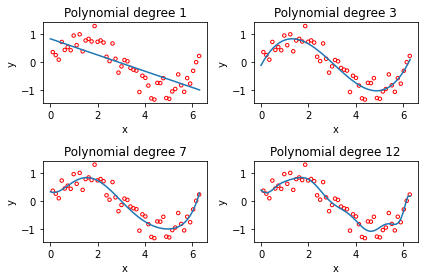

In [116]:
# degree 3 is best.
polynomial_regression(x, y)

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [117]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    x_shuffled = x.copy()
    y_shuffled = y.copy()
    p = np.random.permutation(len(x))
    x_shuffled, y_shuffled = x[p], y[p]

    ratio = int(ratio * x.shape[0])
    x_train, x_test = x_shuffled[:ratio], x_shuffled[ratio:]
    y_train, y_test = y_shuffled[:ratio], y_shuffled[ratio:]

    return x_train, x_test, y_train, y_test
split_data(x,y, 0.8)

(array([5.77843549, 3.00231147, 2.6237491 , 5.02131076, 1.86662437,
        3.50706129, 2.74993656, 1.2356871 , 5.90462294, 1.99281183,
        1.48806201, 5.52606058, 0.98331219, 0.22618746, 2.87612401,
        3.12849893, 5.14749821, 4.01181111, 1.10949964, 2.49756165,
        4.76893584, 6.0308104 , 3.25468638, 2.11899928, 0.1       ,
        3.38087384, 4.64274839, 1.61424946, 2.24518674, 0.60474982,
        4.26418602, 3.7594362 , 4.39037348, 0.47856237, 4.51656093,
        1.36187455, 3.88562366, 5.65224803, 4.13799857, 4.8951233 ]),
 array([6.15699785, 0.35237491, 5.39987312, 0.73093728, 3.63324875,
        2.37137419, 6.28318531, 0.85712473, 1.74043692, 5.27368567]),
 array([-0.56851939, -0.15050841,  0.66750938, -1.30763072,  1.28930361,
        -0.26815701,  0.12187968,  0.99490902, -0.76646743,  0.72778149,
         0.77328884, -0.82651893,  0.95121182,  0.25252451, -0.37259529,
         0.07691219, -1.04670162, -0.55991146,  0.60599855,  0.03761024,
        -0.57230535, -0.

Then, test your `split_data` function below.

In [118]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, x_test, y_train, y_test = split_data(x, y, ratio, seed)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    poly_train = build_poly(x_train, degree)
    poly_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    mse_tr, weights = least_squares(y_train, poly_train)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    mse_te = compute_loss(y_test, poly_test, weights)
    rmse_tr = np.sqrt(2*mse_tr)
    rmse_te = np.sqrt(2*mse_te)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [119]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.255
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.167
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.075
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=3.227


# 3 Ridge Regression
Please fill in the function below.

In [126]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    lambda_i = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    w_prime = np.linalg.solve(tx.T @ tx + lambda_i, tx.T @ y)
    mse = compute_loss(y, tx, w_prime)
    return mse, w_prime

In [124]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, x_test, y_train, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    poly_train = build_poly(x_train, degree)
    poly_test = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        mse_tr, weights = ridge_regression(y_train,poly_train, lambda_)
        mse_te = compute_loss(y_test, poly_test, weights)
        rmse_tr[ind] = np.sqrt(2*mse_tr)
        rmse_te[ind] = np.sqrt(2*mse_te)
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


In [127]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

IndexError: list assignment index out of range